In [29]:
import os
import cv2
import numpy as np
from ultralytics import YOLO
import matplotlib.pyplot as plt
import torch
from PIL import Image
from torchvision import transforms

In [30]:
def mask_to_yolo_format(masks_path, save_dir):

        photos_list = os.listdir(masks_path)
        for i in range(len(photos_list)):

                image = cv2.imread(f'{masks_path}\\{photos_list[i]}', cv2.IMREAD_GRAYSCALE)
                
                _, threshold = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
                
                contours, _ = cv2.findContours(threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
                
                contour_points = [point for point in contours]
                
                new_lst = [[] for i in range(len(contours))]
                for num in range(len(contour_points)):
                        for j in range(len(contour_points[num])):
                                new_lst[num].append(tuple(contour_points[num][j][0]))
                                
                with open(f'{save_dir}\\{photos_list[i][:-3]}txt', "w") as f:
                        for sublist in new_lst:
                                f.write(f'0 ')
                                for x, y in sublist:
                                        f.write(f"{x / 768} {y / 768} ")
                                f.write("\n")

In [31]:
mask_to_yolo_format('C:\\Users\\wysy\\Downloads\\1500masks', 'C:\\Users\\wysy\\Downloads\\1500labels')

In [33]:
from ultralytics import YOLO


# Load a model
model = YOLO('yolov8n-seg.yaml')  # build a new model from YAML

# Train the model
results = model.train(data='config_1.yaml', epochs=100)

New https://pypi.org/project/ultralytics/8.1.13 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.12 🚀 Python-3.11.7 torch-2.2.0+cpu CPU (AMD Ryzen 5 4600H with Radeon Graphics)
engine\trainer: task=segment, mode=train, model=yolov8n-seg.yaml, data=config_1.yaml, epochs=100, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False

train: Scanning C:\Users\wysy\Downloads\data yolov8 masks\labels\train... 900 images, 714 backgrounds, 0 corrupt: 100%|██████████| 900/900 [00:00<00:00, 1072.46it/s]


train: New cache created: C:\Users\wysy\Downloads\data yolov8 masks\labels\train.cache


val: Scanning C:\Users\wysy\Downloads\data yolov8 masks\labels\val.cache... 100 images, 76 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]

Plotting labels to runs\segment\train3\labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\segment\train3
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/100         0G      3.996      7.666      48.51      3.545          1        640: 100%|██████████| 57/57 [06:56<00:00,  7.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:24<00:00,  6.21s/it]

                   all        100         57          0          0          0          0          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/100         0G      4.027      6.046      27.18      3.598          3        640: 100%|██████████| 57/57 [06:50<00:00,  7.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:20<00:00,  5.24s/it]

                   all        100         57          0          0          0          0          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/100         0G      3.635      5.597       18.8      3.198          2        640: 100%|██████████| 57/57 [06:48<00:00,  7.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:34<00:00,  8.52s/it]

                   all        100         57          0          0          0          0          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/100         0G      3.117      4.827       14.5      2.645          0        640: 100%|██████████| 57/57 [06:43<00:00,  7.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:21<00:00,  5.39s/it]

                   all        100         57   0.000304     0.0526   0.000178   0.000106   0.000607      0.105   0.000415   8.19e-05



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/100         0G      3.617      4.979      7.288      3.009          5        640: 100%|██████████| 57/57 [06:42<00:00,  7.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:19<00:00,  4.98s/it]

                   all        100         57    0.00133      0.175    0.00518    0.00125   0.000928      0.123    0.00334   0.000523



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/100         0G      3.099      5.262      6.321      2.563          2        640: 100%|██████████| 57/57 [06:43<00:00,  7.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:19<00:00,  4.98s/it]

                   all        100         57    0.00172      0.228    0.00944    0.00296    0.00225      0.298     0.0159    0.00252



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/100         0G      3.326      4.602       4.97      2.884          0        640: 100%|██████████| 57/57 [06:43<00:00,  7.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:19<00:00,  4.78s/it]

                   all        100         57     0.0255      0.263     0.0503     0.0179     0.0238      0.246     0.0388    0.00934



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/100         0G      2.817      4.214      5.091      2.442          0        640: 100%|██████████| 57/57 [06:47<00:00,  7.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:21<00:00,  5.26s/it]

                   all        100         57    0.00105      0.228     0.0298    0.00547    0.00114      0.246     0.0393     0.0136



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/100         0G      3.308      4.127      4.933       2.68          6        640: 100%|██████████| 57/57 [06:46<00:00,  7.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:20<00:00,  5.14s/it]

                   all        100         57    0.00187      0.316     0.0436     0.0102    0.00166      0.281     0.0537    0.00997



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/100         0G      3.028      3.657      4.138      2.327          2        640: 100%|██████████| 57/57 [06:46<00:00,  7.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:20<00:00,  5.16s/it]

                   all        100         57       0.13     0.0526       0.05       0.02       0.13     0.0526     0.0542     0.0241



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/100         0G      2.968      3.696      4.046      2.381          4        640: 100%|██████████| 57/57 [06:46<00:00,  7.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:19<00:00,  4.80s/it]

                   all        100         57     0.0263      0.175     0.0385     0.0131     0.0263      0.175     0.0541     0.0163



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/100         0G      3.073      3.879      3.958      2.246          3        640: 100%|██████████| 57/57 [06:46<00:00,  7.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:19<00:00,  4.89s/it]

                   all        100         57    0.00847      0.404     0.0465      0.014     0.0081      0.386     0.0323     0.0103



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/100         0G      2.863       3.81      3.714      2.132          2        640: 100%|██████████| 57/57 [06:46<00:00,  7.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:19<00:00,  4.81s/it]

                   all        100         57     0.0149      0.351     0.0825     0.0284     0.0142      0.333     0.0876     0.0296



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/100         0G      2.857      3.538        3.5      2.291          1        640: 100%|██████████| 57/57 [06:46<00:00,  7.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:20<00:00,  5.19s/it]

                   all        100         57     0.0789      0.123     0.0367     0.0178     0.0902       0.14     0.0526     0.0189



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/100         0G      2.859      3.456       3.58      2.123          0        640: 100%|██████████| 57/57 [06:47<00:00,  7.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:19<00:00,  4.79s/it]

                   all        100         57     0.0807      0.193     0.0572     0.0214     0.0612      0.211     0.0707     0.0206



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/100         0G      2.738      3.681       3.62      2.181          0        640: 100%|██████████| 57/57 [06:46<00:00,  7.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:19<00:00,  4.87s/it]

                   all        100         57    0.00616      0.351      0.042     0.0173    0.00586      0.333     0.0488     0.0178



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/100         0G      2.709      3.486      3.583       2.09          0        640: 100%|██████████| 57/57 [06:48<00:00,  7.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:19<00:00,  4.82s/it]

                   all        100         57     0.0187      0.281     0.0383     0.0154     0.0211      0.316     0.0412     0.0127



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/100         0G      2.848      3.189      3.518       2.15          1        640: 100%|██████████| 57/57 [06:47<00:00,  7.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:19<00:00,  4.95s/it]

                   all        100         57    0.00581      0.491     0.0568     0.0263    0.00561      0.474     0.0853     0.0296



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/100         0G      2.756      3.514      3.558      2.126          2        640: 100%|██████████| 57/57 [06:46<00:00,  7.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:19<00:00,  4.88s/it]

                   all        100         57     0.0969       0.14       0.03     0.0131      0.121      0.175     0.0456     0.0152



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/100         0G      2.641      3.349       3.41      2.082          2        640: 100%|██████████| 57/57 [06:46<00:00,  7.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:19<00:00,  4.77s/it]

                   all        100         57     0.0467      0.211     0.0625     0.0248     0.0545      0.246     0.0728     0.0269



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/100         0G       2.92      3.279      3.628      2.168          1        640: 100%|██████████| 57/57 [06:46<00:00,  7.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:19<00:00,  4.79s/it]

                   all        100         57      0.095      0.211     0.0824     0.0376      0.105      0.246     0.0971     0.0358



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/100         0G      2.812      3.173      3.392      2.068          0        640: 100%|██████████| 57/57 [06:46<00:00,  7.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:22<00:00,  5.60s/it]

                   all        100         57      0.152     0.0351     0.0344     0.0141       0.24     0.0556     0.0669     0.0218



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/100         0G      2.769      3.287      3.451      2.143          1        640: 100%|██████████| 57/57 [06:47<00:00,  7.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:19<00:00,  4.86s/it]

                   all        100         57    0.00576      0.333     0.0379      0.015    0.00666      0.386     0.0431     0.0162



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/100         0G      2.754      3.503      3.268      2.046          3        640: 100%|██████████| 57/57 [06:46<00:00,  7.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:21<00:00,  5.27s/it]

                   all        100         57     0.0256      0.211     0.0324     0.0129      0.107      0.175     0.0465     0.0145



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/100         0G      2.702      3.243      3.468       2.02          1        640: 100%|██████████| 57/57 [06:46<00:00,  7.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:19<00:00,  4.82s/it]

                   all        100         57     0.0857      0.123     0.0311     0.0131      0.104     0.0877     0.0616     0.0188



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/100         0G      2.641      3.048      3.031      2.172          0        640: 100%|██████████| 57/57 [06:48<00:00,  7.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:19<00:00,  4.86s/it]

                   all        100         57      0.183      0.123     0.0601     0.0252      0.183      0.123     0.0665      0.025



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/100         0G      2.687      3.187      3.355      1.952          1        640: 100%|██████████| 57/57 [06:46<00:00,  7.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:20<00:00,  5.18s/it]

                   all        100         57      0.166      0.123     0.0608     0.0267      0.187      0.158     0.0798     0.0242



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/100         0G      2.619      3.141      3.108      1.972          1        640: 100%|██████████| 57/57 [06:46<00:00,  7.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:19<00:00,  4.78s/it]

                   all        100         57     0.0747      0.193     0.0744      0.032      0.147      0.175      0.122     0.0347



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/100         0G      2.722      3.195      3.115      2.038          2        640: 100%|██████████| 57/57 [06:46<00:00,  7.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:19<00:00,  4.80s/it]

                   all        100         57       0.13      0.105     0.0584     0.0207      0.133      0.105     0.0683     0.0263



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/100         0G      2.746      3.089      3.397      2.121          4        640: 100%|██████████| 57/57 [06:46<00:00,  7.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:19<00:00,  4.82s/it]

                   all        100         57      0.194     0.0877     0.0583     0.0204      0.272      0.123     0.0835     0.0259



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/100         0G      2.637      3.027      3.106      2.046          0        640: 100%|██████████| 57/57 [06:47<00:00,  7.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:19<00:00,  4.81s/it]

                   all        100         57      0.209      0.158     0.0897     0.0329      0.182       0.14     0.0768     0.0266



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/100         0G      2.614      3.271      2.937      2.075          2        640: 100%|██████████| 57/57 [06:47<00:00,  7.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:19<00:00,  4.83s/it]

                   all        100         57      0.146      0.105     0.0644     0.0321      0.163      0.123     0.0859     0.0344



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/100         0G      2.614      3.339       2.98      1.954          1        640: 100%|██████████| 57/57 [06:46<00:00,  7.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:19<00:00,  4.85s/it]

                   all        100         57      0.335     0.0877     0.0819     0.0367       0.32     0.0877     0.0983     0.0341



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/100         0G      2.798      3.137      3.019      2.029          2        640: 100%|██████████| 57/57 [06:47<00:00,  7.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:19<00:00,  4.93s/it]

                   all        100         57      0.202       0.14     0.0771     0.0261      0.172       0.14      0.107     0.0464



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/100         0G      2.691      3.144      3.193      1.981          2        640: 100%|██████████| 57/57 [06:51<00:00,  7.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:20<00:00,  5.23s/it]

                   all        100         57      0.271      0.123     0.0648     0.0254      0.286      0.123     0.0733     0.0279



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/100         0G      2.607      3.026      2.875      1.803          0        640: 100%|██████████| 57/57 [06:47<00:00,  7.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:19<00:00,  4.80s/it]

                   all        100         57      0.212      0.123     0.0775     0.0348      0.265      0.158      0.105     0.0437



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/100         0G      2.556      2.888      2.989      2.045          3        640: 100%|██████████| 57/57 [06:47<00:00,  7.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:19<00:00,  4.94s/it]

                   all        100         57      0.127       0.14      0.068     0.0256      0.159      0.175     0.0982     0.0349



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/100         0G      2.534      3.088      2.928      1.867          0        640: 100%|██████████| 57/57 [06:46<00:00,  7.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:19<00:00,  4.78s/it]

                   all        100         57      0.196       0.14     0.0835      0.036      0.245      0.175      0.102     0.0368



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/100         0G      2.586       3.15      3.011      2.006          2        640: 100%|██████████| 57/57 [06:47<00:00,  7.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:19<00:00,  4.86s/it]

                   all        100         57      0.171      0.105     0.0727     0.0377       0.18       0.14      0.109     0.0372



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/100         0G      2.583      3.274       3.26      2.077          5        640: 100%|██████████| 57/57 [06:48<00:00,  7.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:19<00:00,  4.80s/it]

                   all        100         57      0.179      0.105     0.0897     0.0466      0.153      0.117      0.122     0.0424



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/100         0G      2.638      2.852      2.928      1.949          5        640: 100%|██████████| 57/57 [06:46<00:00,  7.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:19<00:00,  4.92s/it]

                   all        100         57      0.183     0.0702      0.072     0.0285      0.179      0.123     0.0779     0.0252



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/100         0G      2.425      2.742      2.838      1.905          0        640: 100%|██████████| 57/57 [06:45<00:00,  7.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:19<00:00,  4.82s/it]

                   all        100         57      0.182     0.0877      0.112     0.0484      0.209      0.116      0.128     0.0385



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/100         0G      2.531       2.95      2.864      1.686          7        640: 100%|██████████| 57/57 [06:46<00:00,  7.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:19<00:00,  4.84s/it]

                   all        100         57      0.206      0.105      0.065      0.025      0.234      0.123      0.104     0.0338



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/100         0G       2.45      3.052      2.879      1.765          0        640: 100%|██████████| 57/57 [06:46<00:00,  7.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:19<00:00,  4.86s/it]

                   all        100         57      0.176      0.123     0.0899     0.0365      0.215      0.158       0.11     0.0441



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/100         0G      2.378      2.859      2.752      1.842          2        640: 100%|██████████| 57/57 [06:46<00:00,  7.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:19<00:00,  4.79s/it]

                   all        100         57       0.26       0.14      0.119      0.049      0.293       0.14      0.126     0.0484



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/100         0G      2.434      2.803      2.879       1.87          5        640: 100%|██████████| 57/57 [06:49<00:00,  7.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:21<00:00,  5.42s/it]

                   all        100         57      0.265      0.133     0.0788     0.0362      0.194      0.158     0.0893     0.0384



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/100         0G      2.375      2.865       2.79      1.847          2        640: 100%|██████████| 57/57 [06:56<00:00,  7.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:19<00:00,  4.91s/it]

                   all        100         57      0.351      0.123      0.116     0.0487       0.22      0.193      0.138       0.06



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/100         0G       2.42      2.751      2.798      1.994          7        640: 100%|██████████| 57/57 [06:47<00:00,  7.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:19<00:00,  4.88s/it]

                   all        100         57       0.32     0.0877     0.0916     0.0397      0.344       0.14       0.12     0.0405



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/100         0G      2.523      2.792       2.83      1.884          7        640: 100%|██████████| 57/57 [06:47<00:00,  7.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:19<00:00,  4.79s/it]

                   all        100         57      0.276      0.105      0.134     0.0658      0.368       0.14      0.144     0.0616



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/100         0G      2.437      2.705      2.715       1.78          0        640: 100%|██████████| 57/57 [06:46<00:00,  7.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:19<00:00,  4.83s/it]

                   all        100         57      0.382      0.158      0.162     0.0729      0.346       0.14      0.185     0.0694



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/100         0G      2.394      2.793      2.595      1.832          2        640: 100%|██████████| 57/57 [06:46<00:00,  7.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:19<00:00,  4.99s/it]

                   all        100         57      0.277      0.123      0.115     0.0593      0.277      0.175      0.142     0.0539



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/100         0G        2.4      2.897      2.723      1.755          0        640: 100%|██████████| 57/57 [06:46<00:00,  7.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:19<00:00,  4.91s/it]

                   all        100         57      0.288      0.105      0.102     0.0558      0.355      0.154      0.134     0.0566



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/100         0G      2.272      2.701      2.591      1.711          2        640: 100%|██████████| 57/57 [06:46<00:00,  7.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:19<00:00,  4.82s/it]

                   all        100         57      0.226       0.14       0.14     0.0712      0.366      0.152      0.156     0.0535



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/100         0G      2.456      2.912      2.757      1.799          0        640: 100%|██████████| 57/57 [06:47<00:00,  7.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:19<00:00,  4.85s/it]

                   all        100         57      0.253     0.0951     0.0983     0.0431      0.368      0.143      0.128     0.0422



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/100         0G      2.347      2.567      2.527      1.759          2        640: 100%|██████████| 57/57 [06:47<00:00,  7.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:19<00:00,  4.81s/it]

                   all        100         57      0.429       0.14      0.151     0.0704      0.347      0.193      0.146     0.0578



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/100         0G       2.28      2.615      2.636      1.773          3        640: 100%|██████████| 57/57 [06:46<00:00,  7.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:19<00:00,  4.82s/it]

                   all        100         57      0.553       0.14      0.175     0.0813      0.421      0.158      0.199      0.076



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/100         0G      2.407      2.693      2.782      1.869          0        640: 100%|██████████| 57/57 [06:47<00:00,  7.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:19<00:00,  4.85s/it]

                   all        100         57      0.408       0.14      0.113     0.0641      0.348      0.158      0.139     0.0552



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/100         0G      2.364      2.769      2.576      1.811          1        640: 100%|██████████| 57/57 [06:46<00:00,  7.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:19<00:00,  4.80s/it]

                   all        100         57       0.26      0.123      0.128     0.0754      0.301      0.123       0.13     0.0593



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/100         0G      2.265       2.59      2.347      1.756          0        640: 100%|██████████| 57/57 [06:46<00:00,  7.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:19<00:00,  4.83s/it]

                   all        100         57      0.277      0.175      0.124      0.048      0.336      0.193       0.14     0.0546



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/100         0G      2.281      2.553      2.443      1.746          0        640: 100%|██████████| 57/57 [06:46<00:00,  7.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:19<00:00,  4.83s/it]

                   all        100         57      0.357      0.123      0.141     0.0609      0.266      0.175      0.164     0.0648



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/100         0G      2.255      2.748      2.785      1.812          0        640: 100%|██████████| 57/57 [06:46<00:00,  7.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:19<00:00,  4.82s/it]

                   all        100         57      0.358       0.14      0.136     0.0736      0.455      0.193      0.177     0.0724



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/100         0G      2.338      2.562       2.65      1.878          3        640: 100%|██████████| 57/57 [06:46<00:00,  7.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:19<00:00,  4.93s/it]

                   all        100         57      0.281      0.228      0.133     0.0543       0.29      0.281      0.171       0.06



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/100         0G      2.323      2.659      2.461      1.684          0        640: 100%|██████████| 57/57 [06:46<00:00,  7.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:19<00:00,  4.81s/it]

                   all        100         57      0.315      0.158      0.133     0.0564      0.416      0.175      0.165     0.0574



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/100         0G      2.238      2.643       2.38      1.677          2        640: 100%|██████████| 57/57 [06:46<00:00,  7.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:19<00:00,  4.86s/it]

                   all        100         57      0.252      0.158      0.162     0.0746      0.215      0.158      0.167     0.0609



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/100         0G      2.219      2.514      2.359      1.627          7        640: 100%|██████████| 57/57 [06:47<00:00,  7.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:19<00:00,  4.78s/it]

                   all        100         57      0.274      0.158      0.167     0.0804      0.311      0.175      0.224     0.0755



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/100         0G      2.337      2.607      2.444      1.742          1        640: 100%|██████████| 57/57 [06:51<00:00,  7.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:19<00:00,  4.82s/it]

                   all        100         57      0.414       0.14      0.155     0.0832      0.232      0.263       0.19     0.0774



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/100         0G      2.234      2.581      2.396      1.673          0        640: 100%|██████████| 57/57 [08:07<00:00,  8.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:22<00:00,  5.53s/it]

                   all        100         57      0.276      0.158      0.187     0.0995      0.274      0.193      0.198     0.0839



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/100         0G      2.334      2.533      2.433      1.764          2        640: 100%|██████████| 57/57 [10:58<00:00, 11.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:36<00:00,  9.04s/it]

                   all        100         57      0.419      0.175      0.178     0.0879      0.312      0.228      0.191     0.0789



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/100         0G       2.24      2.681      2.401      1.777          1        640: 100%|██████████| 57/57 [10:07<00:00, 10.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:29<00:00,  7.35s/it]

                   all        100         57      0.412      0.123      0.163     0.0771      0.218      0.193      0.187     0.0735



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/100         0G      2.132      2.791      2.301      1.644          1        640: 100%|██████████| 57/57 [09:06<00:00,  9.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:25<00:00,  6.37s/it]

                   all        100         57      0.328      0.266      0.215     0.0973       0.33      0.263      0.243      0.092



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/100         0G      2.345       2.86      2.352      1.711          4        640: 100%|██████████| 57/57 [09:04<00:00,  9.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:26<00:00,  6.53s/it]

                   all        100         57      0.365      0.193      0.175     0.0896       0.29      0.228      0.214     0.0856



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/100         0G      2.062      2.488      2.244      1.697          0        640: 100%|██████████| 57/57 [09:45<00:00, 10.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:20<00:00,  5.01s/it]

                   all        100         57      0.527      0.123      0.166     0.0898      0.252      0.281      0.204     0.0765



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/100         0G      2.108       2.42      2.298      1.644          0        640: 100%|██████████| 57/57 [09:30<00:00, 10.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:27<00:00,  6.79s/it]

                   all        100         57      0.639       0.14      0.193      0.104      0.245      0.298      0.206     0.0847



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/100         0G      2.214      2.902      2.346      1.665          3        640: 100%|██████████| 57/57 [09:09<00:00,  9.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:26<00:00,  6.58s/it]

                   all        100         57      0.341      0.175      0.183        0.1      0.378      0.211      0.216     0.0973



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/100         0G      2.114      2.501      2.174       1.71          1        640: 100%|██████████| 57/57 [09:05<00:00,  9.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:26<00:00,  6.53s/it]

                   all        100         57      0.571       0.14      0.156     0.0905      0.498       0.14      0.176     0.0766



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/100         0G      2.191      2.613      2.313      1.648          5        640: 100%|██████████| 57/57 [09:05<00:00,  9.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:26<00:00,  6.62s/it]

                   all        100         57      0.372       0.14       0.17      0.079      0.393      0.159      0.203     0.0848



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     77/100         0G      2.216      2.665      2.335      1.789          2        640: 100%|██████████| 57/57 [09:06<00:00,  9.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:26<00:00,  6.50s/it]

                   all        100         57      0.308      0.281      0.204      0.101      0.273      0.333      0.243     0.0952



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     78/100         0G        2.1      2.525      2.369      1.684          1        640: 100%|██████████| 57/57 [07:11<00:00,  7.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:19<00:00,  4.78s/it]

                   all        100         57      0.331      0.263      0.226      0.112        0.4      0.305      0.273      0.107



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     79/100         0G      2.209       2.64      2.238      1.675          9        640: 100%|██████████| 57/57 [06:49<00:00,  7.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:19<00:00,  4.82s/it]

                   all        100         57      0.337      0.211      0.205     0.0987      0.471      0.228      0.233     0.0911



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     80/100         0G      2.219      2.552      2.236      1.783          2        640: 100%|██████████| 57/57 [07:00<00:00,  7.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:19<00:00,  4.94s/it]

                   all        100         57      0.299      0.175      0.192      0.101      0.436      0.158      0.206     0.0904



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     81/100         0G      2.271      2.502      2.204      1.757          0        640: 100%|██████████| 57/57 [06:59<00:00,  7.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:20<00:00,  5.00s/it]

                   all        100         57      0.295      0.246      0.202      0.107      0.356      0.281      0.247      0.102



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     82/100         0G      2.229      2.606      2.283      1.754          0        640: 100%|██████████| 57/57 [07:14<00:00,  7.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:20<00:00,  5.23s/it]

                   all        100         57      0.347      0.193      0.197     0.0983      0.382      0.211       0.22     0.0926



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     83/100         0G      2.145       2.52      2.243      1.643          9        640: 100%|██████████| 57/57 [07:19<00:00,  7.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:21<00:00,  5.26s/it]

                   all        100         57      0.346      0.263       0.23      0.103      0.415      0.316      0.262      0.109



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     84/100         0G      2.136       2.52      2.081      1.643          6        640: 100%|██████████| 57/57 [07:17<00:00,  7.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:20<00:00,  5.21s/it]

                   all        100         57      0.344      0.211      0.213       0.11      0.377      0.228      0.237      0.106



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     85/100         0G      2.069      2.339      1.953      1.724          1        640: 100%|██████████| 57/57 [07:07<00:00,  7.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:20<00:00,  5.09s/it]

                   all        100         57      0.414       0.26       0.23      0.114      0.449      0.298      0.257      0.108



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     86/100         0G      2.106      2.574      2.262       1.67          8        640: 100%|██████████| 57/57 [06:57<00:00,  7.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:19<00:00,  4.91s/it]

                   all        100         57       0.47      0.281      0.268      0.129      0.401      0.263       0.27       0.11



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     87/100         0G      2.058      2.609      1.955      1.527          1        640: 100%|██████████| 57/57 [11:10<00:00, 11.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:33<00:00,  8.30s/it]

                   all        100         57       0.35      0.298       0.27       0.12      0.341      0.298      0.285      0.116



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     88/100         0G      2.059       2.46      2.097      1.589          0        640: 100%|██████████| 57/57 [11:13<00:00, 11.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:32<00:00,  8.23s/it]

                   all        100         57      0.354      0.333      0.254      0.118      0.303      0.333      0.265      0.117



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     89/100         0G      1.989      2.414      1.946       1.59          0        640: 100%|██████████| 57/57 [10:48<00:00, 11.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:32<00:00,  8.20s/it]

                   all        100         57      0.316      0.246      0.241      0.119      0.302      0.246      0.261      0.101



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     90/100         0G      2.081      2.497      2.212      1.599          3        640: 100%|██████████| 57/57 [10:45<00:00, 11.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:33<00:00,  8.26s/it]

                   all        100         57      0.316      0.298      0.256      0.113      0.354      0.316      0.278      0.114


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     91/100         0G      1.902      2.353      2.171      1.619          1        640: 100%|██████████| 57/57 [09:07<00:00,  9.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:19<00:00,  4.78s/it]

                   all        100         57      0.329      0.228      0.259      0.124      0.339      0.287      0.294      0.116



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     92/100         0G      1.997      2.283      2.187      1.598          0        640: 100%|██████████| 57/57 [06:41<00:00,  7.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:19<00:00,  4.78s/it]

                   all        100         57       0.32      0.298      0.251      0.112       0.32      0.298      0.293      0.117



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     93/100         0G      1.983      2.379      2.064      1.566          0        640: 100%|██████████| 57/57 [06:41<00:00,  7.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:18<00:00,  4.75s/it]

                   all        100         57      0.298      0.316      0.261      0.136       0.33      0.351      0.313      0.127



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     94/100         0G      1.958      2.337      1.881      1.501          0        640: 100%|██████████| 57/57 [06:42<00:00,  7.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:19<00:00,  4.85s/it]

                   all        100         57      0.643      0.193      0.266      0.126      0.552      0.228      0.306      0.128



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     95/100         0G      1.928      2.417      2.093      1.483          2        640: 100%|██████████| 57/57 [09:09<00:00,  9.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:32<00:00,  8.18s/it]

                   all        100         57      0.396      0.228      0.254      0.111      0.619      0.175      0.261      0.097



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     96/100         0G      2.015      2.304      2.088      1.521          0        640: 100%|██████████| 57/57 [10:01<00:00, 10.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:32<00:00,  8.22s/it]

                   all        100         57      0.391      0.228      0.232      0.113      0.411      0.246      0.257      0.099



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     97/100         0G      1.979      2.292      1.994      1.584          0        640: 100%|██████████| 57/57 [10:21<00:00, 10.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:32<00:00,  8.21s/it]

                   all        100         57      0.326      0.254      0.232      0.115      0.315      0.263      0.249     0.0996



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     98/100         0G      1.881      2.204      1.979      1.636          2        640: 100%|██████████| 57/57 [08:48<00:00,  9.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:19<00:00,  4.86s/it]

                   all        100         57      0.422      0.211       0.23      0.116      0.389      0.228      0.258     0.0972



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     99/100         0G       1.88      2.228       1.99      1.644          0        640: 100%|██████████| 57/57 [06:47<00:00,  7.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:19<00:00,  4.89s/it]

                   all        100         57      0.342      0.228      0.227      0.119      0.401      0.228      0.253      0.098



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    100/100         0G       1.81      2.123       1.89      1.575          2        640: 100%|██████████| 57/57 [06:57<00:00,  7.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:19<00:00,  4.93s/it]

                   all        100         57      0.343      0.246      0.234      0.125      0.366      0.246      0.265      0.106



100 epochs completed in 12.951 hours.
Optimizer stripped from runs\segment\train3\weights\last.pt, 6.8MB
Optimizer stripped from runs\segment\train3\weights\best.pt, 6.8MB

Validating runs\segment\train3\weights\best.pt...
Ultralytics YOLOv8.1.12 🚀 Python-3.11.7 torch-2.2.0+cpu CPU (AMD Ryzen 5 4600H with Radeon Graphics)
YOLOv8n-seg summary (fused): 195 layers, 3258259 parameters, 0 gradients, 12.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:15<00:00,  3.98s/it]


                   all        100         57      0.296      0.318      0.261      0.136      0.329      0.353      0.313      0.127
Speed: 2.7ms preprocess, 135.7ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to runs\segment\train3


In [6]:
path = 'C:\\Users\\wysy\\Downloads\\pred500\\images'
model_path = 'C:\\Users\\wysy\\Downloads\\data yolov8 masks\\runs\\segment\\train3\\weights\\best.pt'
model = YOLO(model_path)
photos_dir = os.listdir(path)
photoes_path = [f'{path}\\{i}' for i in photos_dir]
pred = model(photoes_path)


0: 640x640 (no detections), 1: 640x640 (no detections), 2: 640x640 (no detections), 3: 640x640 2 ships, 4: 640x640 (no detections), 5: 640x640 1 ship, 6: 640x640 (no detections), 7: 640x640 (no detections), 8: 640x640 (no detections), 9: 640x640 (no detections), 10: 640x640 (no detections), 11: 640x640 (no detections), 12: 640x640 (no detections), 13: 640x640 6 ships, 14: 640x640 (no detections), 15: 640x640 (no detections), 16: 640x640 1 ship, 17: 640x640 (no detections), 18: 640x640 (no detections), 19: 640x640 (no detections), 20: 640x640 (no detections), 21: 640x640 (no detections), 22: 640x640 (no detections), 23: 640x640 (no detections), 24: 640x640 (no detections), 25: 640x640 (no detections), 26: 640x640 (no detections), 27: 640x640 (no detections), 28: 640x640 (no detections), 29: 640x640 (no detections), 30: 640x640 (no detections), 31: 640x640 (no detections), 32: 640x640 (no detections), 33: 640x640 (no detections), 34: 640x640 (no detections), 35: 640x640 (no detections),

In [46]:
for num in range(len(pred)):
    array1 = np.zeros((640, 640))
    if pred[num].masks is not None:
        for j, mask in enumerate(pred[num].masks.data):

            mask = mask.numpy() * 255
            array1 = np.add(array1, mask)

            cv2.imwrite(f'C:\\Users\\wysy\\Downloads\\pred500\\pred_masks\\{photos_dir[num]}', array1)
    else:
        cv2.imwrite(f'C:\\Users\\wysy\\Downloads\\pred500\\pred_masks\\{photos_dir[num]}', np.zeros((640, 640)) * 255)

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [26]:
def dice_loss(pred, target):
    """This definition generalize to real valued pred and target vector.
    This should be differentiable.
    pred: tensor with first dimension as batch
    target: tensor with first dimension as batch
    """

    smooth = 1.

    iflat = pred.contiguous().view(-1)
    tflat = target.contiguous().view(-1)
    intersection = (iflat * tflat).sum()

    A_sum = torch.sum(tflat * iflat)
    B_sum = torch.sum(tflat * tflat)
    
    return 1 - ((2. * intersection + smooth) / (A_sum + B_sum + smooth) )

In [1]:
import torch
from PIL import Image
from torchvision import transforms

photos_dir = os.listdir('C:\\Users\\wysy\\Downloads\\pred500\\pred_masks')
dice_lst = []

for i in range(len(photos_dir)):
    
    image = Image.open(f'C:\\Users\\wysy\\Downloads\\pred500\\masks\\{photos_dir[i]}').resize((640, 640))
    mask = Image.open(f'C:\\Users\\wysy\\Downloads\\pred500\\pred_masks\\{photos_dir[i]}').resize((640, 640))
    transform = transforms.Compose([
        transforms.PILToTensor()
    ])

    tensor_image = transform(image)
    
    tensor_mask = transform(mask) 
    new_tensor_mask = torch.empty(3, 1, 640, 640)
    for i in range(3):
        new_tensor_mask[i] = tensor_mask
    tensor_mask = new_tensor_mask.squeeze(1)
    print(tensor_image.shape, tensor_mask.shape)
    if tensor_mask is not None and tensor_image is not None:
        dice_0 = dice_loss(tensor_image, tensor_mask)
        if dice_0 != 0:
            dice_lst.append(dice_0.item())

NameError: name 'os' is not defined

In [109]:
sum(dice_lst) / len(dice_lst)

0.47276103496551514

In [21]:
path = os.listdir('C:\\Users\\wysy\\Downloads\\images')

In [22]:
paths = [f'C:\\Users\\wysy\\Downloads\\images\\{i}' for i in path]

In [23]:
paths

['C:\\Users\\wysy\\Downloads\\images\\00286e8b9.jpg',
 'C:\\Users\\wysy\\Downloads\\images\\007534159.jpg',
 'C:\\Users\\wysy\\Downloads\\images\\008605bcf.jpg',
 'C:\\Users\\wysy\\Downloads\\images\\0104ed53e.jpg',
 'C:\\Users\\wysy\\Downloads\\images\\0106d2433.jpg']

In [11]:
def segment(*images):
    fig, ax = plt.subplots(ncols=3, nrows=len(paths), figsize=(15, 4 * len(paths)))
    for i, image in enumerate(images):
        for a in ax[i]:
            a.set_xticks([])
            a.set_yticks([])

        # ! Заменить на функцию предсказания
        # predicted_mask = predict(image)
        # ! Заменить на функцию получения ожидаемой маски
        # expected_mask = get_mask(image)
        
        predicted_mask = f'C:\\Users\\wysy\\Downloads\\pred500\\masks{}'

        ax[i, 0].imshow(image)
        ax[i, 1].imshow(expected_mask)
        ax[i, 2].imshow(predicted_mask)

        ax[i, 0].set_title("Image")
        ax[i, 1].set_title("Mask")
        ax[i, 2].set_title(f"Predict Dice = {dice:.6f}")

torch.Size([3, 640, 640]) torch.Size([3, 640, 640])
torch.Size([3, 640, 640]) torch.Size([3, 640, 640])
torch.Size([3, 640, 640]) torch.Size([3, 640, 640])
torch.Size([3, 640, 640]) torch.Size([3, 640, 640])
torch.Size([3, 640, 640]) torch.Size([3, 640, 640])
torch.Size([3, 640, 640]) torch.Size([3, 640, 640])
torch.Size([3, 640, 640]) torch.Size([3, 640, 640])
torch.Size([3, 640, 640]) torch.Size([3, 640, 640])
torch.Size([3, 640, 640]) torch.Size([3, 640, 640])
torch.Size([3, 640, 640]) torch.Size([3, 640, 640])
torch.Size([3, 640, 640]) torch.Size([3, 640, 640])
torch.Size([3, 640, 640]) torch.Size([3, 640, 640])
torch.Size([3, 640, 640]) torch.Size([3, 640, 640])
torch.Size([3, 640, 640]) torch.Size([3, 640, 640])
torch.Size([3, 640, 640]) torch.Size([3, 640, 640])


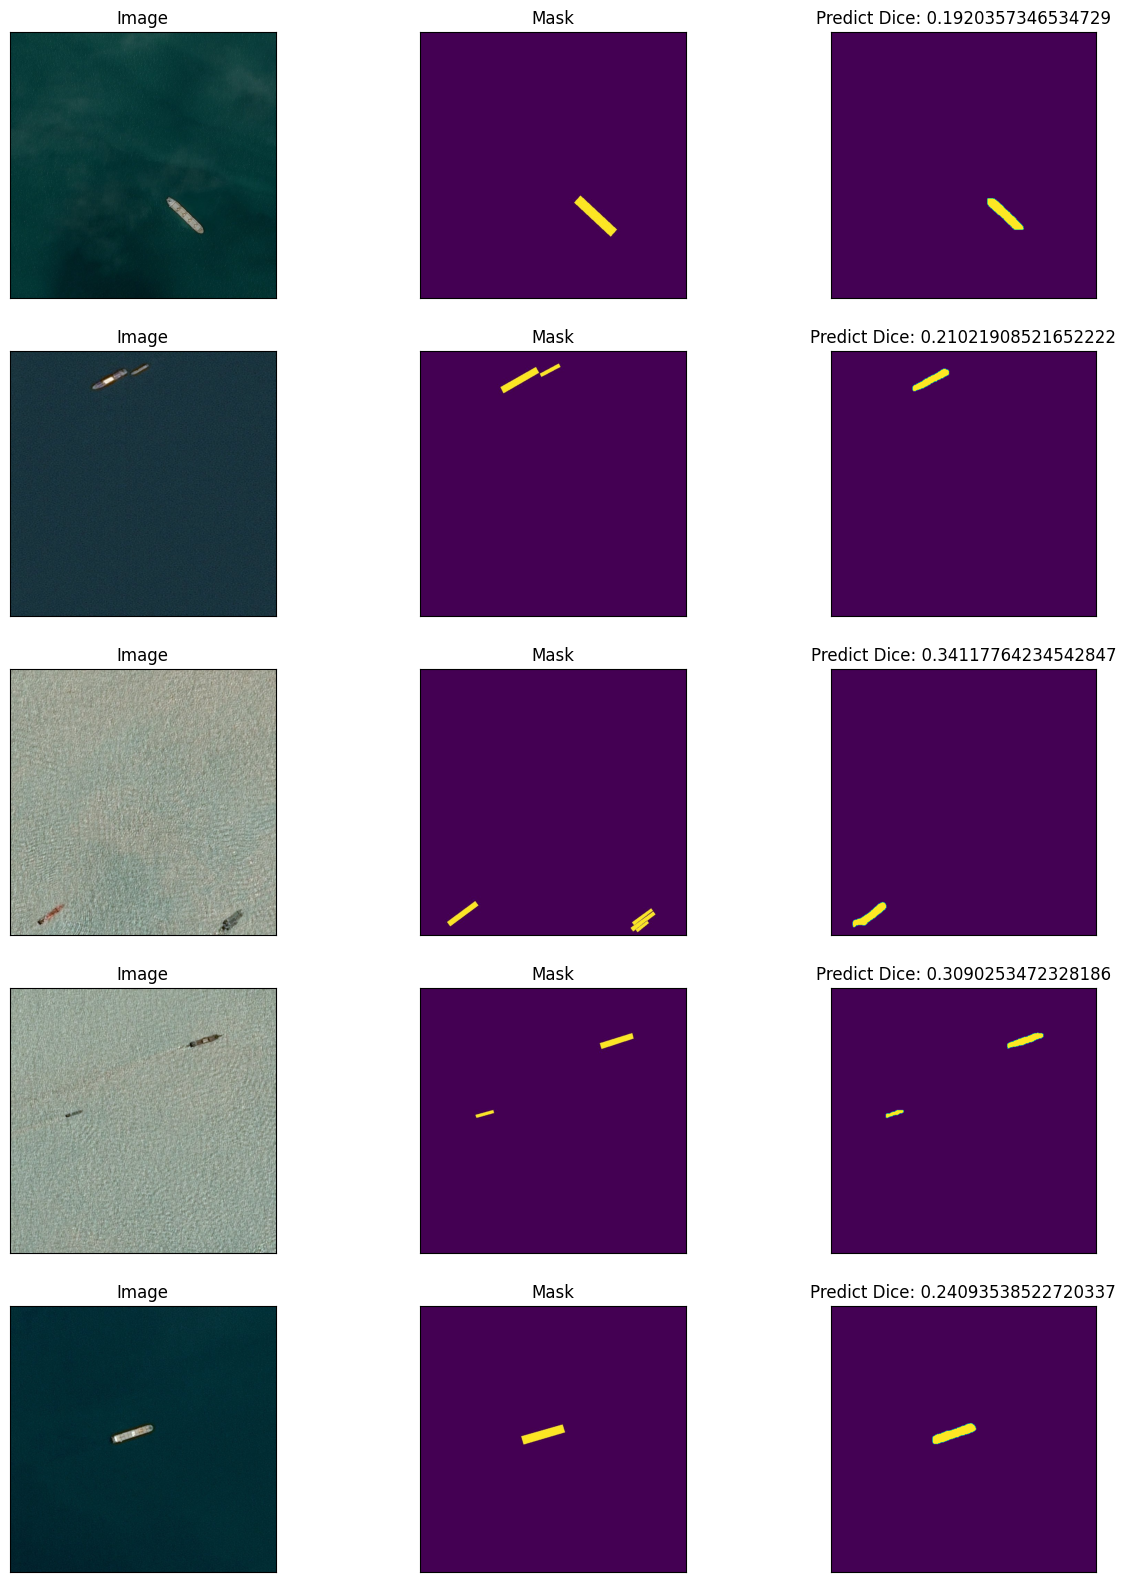

In [44]:
fig, ax = plt.subplots(ncols=3, nrows=len(paths), figsize=(15, 4 * len(paths)))
for i in range(len(paths)):
        
        for a in ax[i]:
                a.set_xticks([])
                a.set_yticks([])
                
                image = Image.open(paths[i])
                expected_mask = Image.open(f'C:\\Users\\wysy\\Downloads\\pred500\\masks\\{path[i]}').resize((640, 640))
                predicted_mask = Image.open(f'C:\\Users\\wysy\\Downloads\\pred500\\pred_masks\\{path[i]}')
                
                ax[i, 0].imshow(image)
                ax[i, 1].imshow(expected_mask)
                ax[i, 2].imshow(predicted_mask)

                transform = transforms.Compose([transforms.PILToTensor()])

                tensor_expected_mask = transform(expected_mask)   
                tensor_predicted_mask = transform(predicted_mask)  
                new_tensor_mask = torch.empty(3, 1, 640, 640)
                for j in range(3):
                        new_tensor_mask[j] = tensor_predicted_mask
                tensor_predicted_mask = new_tensor_mask.squeeze(1)    
                print(tensor_expected_mask.shape, tensor_predicted_mask.shape)
                # print(dice_loss(tensor_expected_mask, tensor_predicted_mask))
                ax[i, 0].set_title("Image")
                ax[i, 1].set_title("Mask")
                ax[i, 2].set_title(f"Predict Dice: {dice_loss(tensor_expected_mask, tensor_predicted_mask)}")
